In [111]:
# Importing all the required Libraries

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential                                                            
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization,Activation, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras import regularizers
import numpy as np 
import cv2
import os

# Removing all those annoying Warnings

import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [21]:
my_data = "dataset/"

In [22]:
#Let's confirm if we can access train and test folders 
os.listdir(my_data)

['test', 'train']

In [23]:
train_path = my_data + '/train'
test_path = my_data + '/test'

In [24]:
print('Train data items')
os.listdir(train_path)

Train data items


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [25]:
print('Test data items')
os.listdir(test_path)

Test data items


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

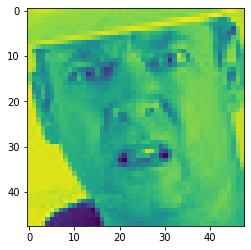

In [33]:
# Checking verious folders

for i in range(5):
    img = os.listdir(train_path+'\\angry')[i]
    img = train_path+'\\angry'+'\\' + img
    
    #showing the first image of angry folder
    plt.imshow(imread(img))

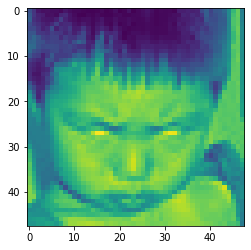

In [34]:
#getting the first image of angry folder
os.listdir(train_path+'\\angry')[0]
img =train_path+'\\angry'+'\\Training_10118481.jpg'

#showing the first image of angry folder
plt.imshow(imread(img))

## Data Visualization
The dataset consists of 2 folders - training and test All the images of dataset are grayscale images of size 48,48 Both these folders consist of 7 folders each.All these 7 folders contain images of peoples faces with respective emotion. We deleted 2 folders out of 7 which consisted of least numbers of images so that our model can train better on other model and give better accuracy. (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains approximately 36K images.
<br/><br/>
Dataset is converted into raw images and splitted in multiple folders which are train and validation folders. 80% of our images are contained inside the train folder, and the last 20% are inside the validation folder.

In [35]:
#define a function to plot some images from different classes

def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

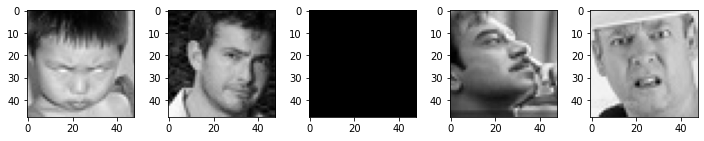

In [36]:
#sample of angry class
plot_images(train_path+'/angry')

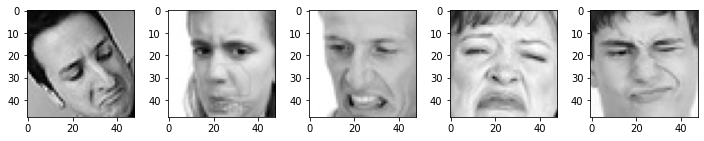

In [37]:
#sample of disgust class
plot_images(train_path+'/disgust')

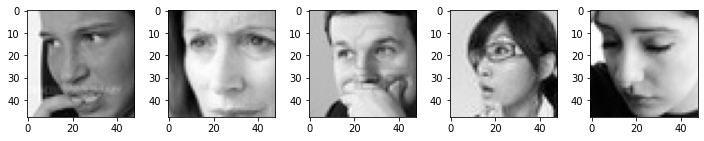

In [38]:
#sample of fear class
plot_images(train_path+'/fear')

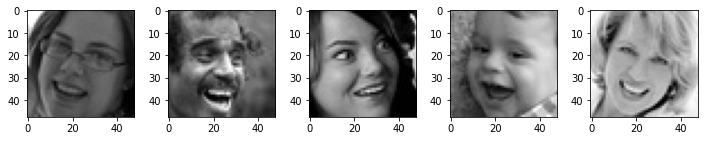

In [39]:
#sample of happy class
plot_images(train_path+'/happy')

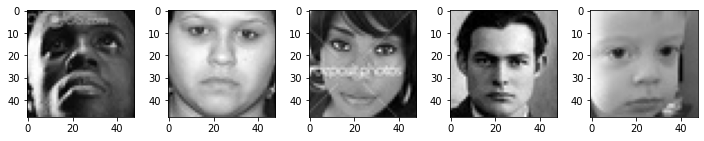

In [40]:
#sample of neutral class
plot_images(train_path+'/neutral')

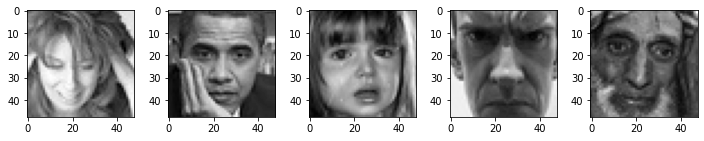

In [41]:
#sample of sad class
plot_images(train_path+'/sad')

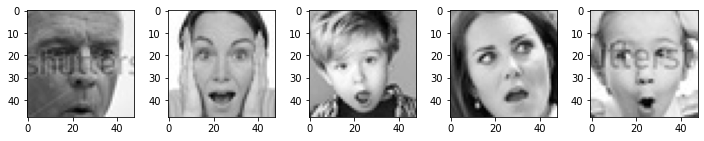

In [42]:
#sample of surprise class
plot_images(train_path+'/surprise')

In [48]:
# Let's create a dictionary, for creating dataframe
  
# Create your dictionary class
class my_dictionary(dict):
  
    # __init__ function
    def __init__(self):
        self = dict()
          
    # Function to add key:value
    def add(self, key, value):
        self[key] = value

In [58]:
dict_obj = my_dictionary()
lst1 = []
lst = []
for expression in os.listdir(train_path):
    print(str(len(os.listdir(train_path +'/'+expression))) + " " + expression + " images")
    dict_obj.add(expression,len(os.listdir(train_path +'/'+expression)))
    lst1.append(expression)
    lst.append(len(os.listdir(train_path +'/'+expression)))

3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


In [89]:
df = pd.DataFrame(list(zip(lst1, lst)),
columns=['Emotion','Count Images'])
df

,Emotion,Count Images
0,angry,3995
1,disgust,436
2,fear,4097
3,happy,7215
4,neutral,4965
5,sad,4830
6,surprise,3171


In [91]:
df = df.sort_values(by=['Count Images'])

Text(0.5, 1.0, 'Count of images vs emotion')

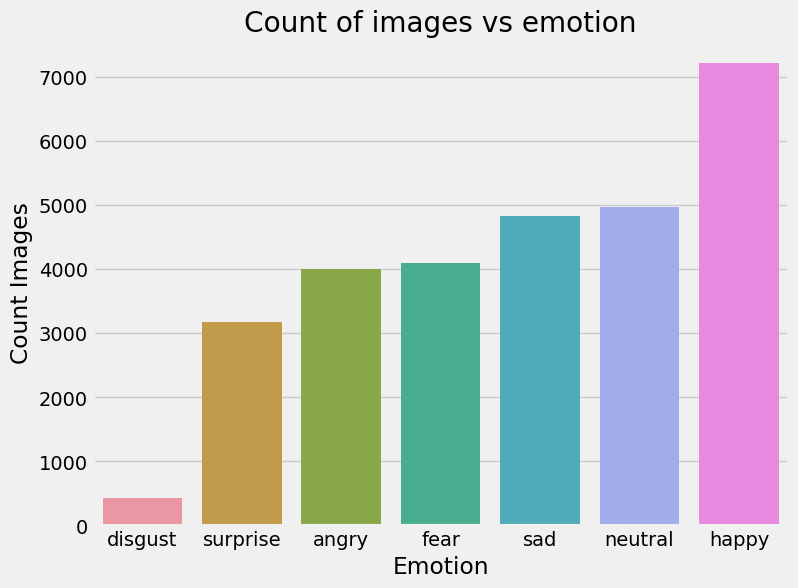

In [101]:
plt.style.use('fivethirtyeight')
plt.figure(dpi=100, figsize=(8,6))
sns.barplot(x=df['Emotion'], y=df['Count Images'])
plt.title('Count of images vs emotion')

In [104]:
img_size = 48 #original size of the image

In [103]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)


In [106]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_path,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_path,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [112]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [113]:
epochs = 60
batch_size = 64

In [114]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 128)      

In [115]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 937s 3s/step - loss: 9.2999 - accuracy: 0.1955 - val_loss: 8.6915 - val_accuracy: 0.1564
Epoch 2/60
359/359 [==============================] - 1809s 5s/step - loss: 8.2892 - accuracy: 0.2261 - val_loss: 7.6244 - val_accuracy: 0.2584
Epoch 3/60
359/359 [==============================] - 1096s 3s/step - loss: 7.3044 - accuracy: 0.2642 - val_loss: 6.6488 - val_accuracy: 0.3101
Epoch 4/60
359/359 [==============================] - 1066s 3s/step - loss: 6.3558 - accuracy: 0.2963 - val_loss: 5.7397 - val_accuracy: 0.3506
Epoch 5/60
359/359 [==============================] - 1250s 3s/step - loss: 5.4846 - accuracy: 0.3301 - val_loss: 4.9003 - val_accuracy: 0.3932
Epoch 6/60
359/359 [==============================] - 995s 3s/step - loss: 4.7547 - accuracy: 0.3509 - val_loss: 4.4279 - val_accuracy: 0.3799
Epoch 7/60
359/359 [==============================] - 1219s 3s/step - loss: 4.1189 - accuracy: 0.3812 - val_loss: 3.6923 - val_accuracy: 0

UnknownError:  FileNotFoundError: [Errno 2] No such file or directory: 'dataset//train\\angry\\Training_29502116.jpg'
Traceback (most recent call last):

  File "D:\Anaconda\envs\dlib_env\lib\site-packages\tensorflow\python\ops\script_ops.py", line 249, in __call__
    ret = func(*args)

  File "D:\Anaconda\envs\dlib_env\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "D:\Anaconda\envs\dlib_env\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 892, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "D:\Anaconda\envs\dlib_env\lib\site-packages\keras\engine\data_adapter.py", line 822, in wrapped_generator
    for data in generator_fn():

  File "D:\Anaconda\envs\dlib_env\lib\site-packages\keras\engine\data_adapter.py", line 948, in generator_fn
    yield x[i]

  File "D:\Anaconda\envs\dlib_env\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "D:\Anaconda\envs\dlib_env\lib\site-packages\keras_preprocessing\image\iterator.py", line 230, in _get_batches_of_transformed_samples
    interpolation=self.interpolation)

  File "D:\Anaconda\envs\dlib_env\lib\site-packages\keras_preprocessing\image\utils.py", line 113, in load_img
    with open(path, 'rb') as f:

FileNotFoundError: [Errno 2] No such file or directory: 'dataset//train\\angry\\Training_29502116.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_2618]

Function call stack:
train_function


In [117]:
# saving the history of the model in data frame 
df=pd.DataFrame(model.history.history)

In [118]:
model.save('model_optimal.h5')

<AxesSubplot:>

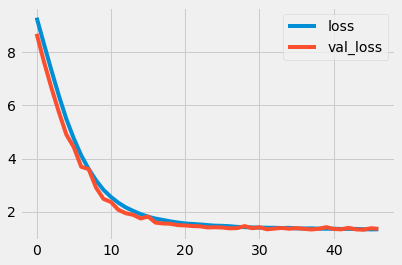

In [119]:
#Plotting Loss
df[['loss','val_loss']].plot()

<AxesSubplot:>

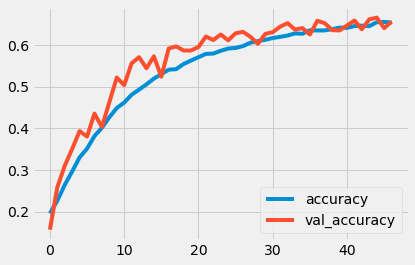

In [120]:
#Plotting accuracy
df[['accuracy','val_accuracy']].plot()

In [122]:
# Data Generators for CNN
img_size = 48
batch_size = 32
datagen_train = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
train_generator = datagen_train.flow_from_directory(train_path,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  color_mode='grayscale',
                                                  class_mode='categorical')

datagen_validation = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
validation_generator = datagen_train.flow_from_directory(test_path,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  color_mode='grayscale',
                                                  class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Building the custom CNN Model
We chose to use a Convolutional Neural Network in order to tackle this face recognition problem. Indeed this type of Neural Network (NN) is good for extracting the features of images and is widely used for image analysis subjects like image classification.

Now let's define the architecture of our CNN:

In [123]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# output layer 
model.add(Dense(7, activation='softmax'))

# compiling the model
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_9 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 128)      

In [124]:
epochs=50
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch

897

In [125]:
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps

224

In [126]:
#  adding various CAllBacks to prevent overfiiting
# this decreases the learning rate if the model loss does not decrease 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
# to save model weights 
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=5,
                            verbose=1,
                            restore_best_weights=True)
callbacks = [checkpoint, reduce_lr, early_stopping]

In [127]:
# fitting the model
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks,
    verbose=1)

Epoch 1/50
897/897 [==============================] - 1663s 2s/step - loss: 1.7421 - accuracy: 0.3276 - val_loss: 1.5528 - val_accuracy: 0.4194

Epoch 00001: saving model to model_weights.h5
Epoch 2/50
 32/897 [>.............................] - ETA: 25:58 - loss: 1.5449 - accuracy: 0.4033

KeyboardInterrupt: 